In [ ]:
Porffolio
1.投资组合的日收益率
2.投资组合的风险评价指标:sharpe ratio

In [ ]:
(1)假设投入资金10000
(2)买入组合的分配比例 allocat=(0.3, 0.2, 0.2, 0.3)
(3)时间从17-01/03~06/05

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 投资组合股票价格
df_close = pd.read_csv('../Data/data/close_4.csv',index_col='date')
df_close[:3]

,SZ,JFJS,CYDL,MD
date,,,,
2017-01-03,2307.89,9.121,6.11,29.12
2017-01-04,2322.21,9.230,6.12,29.83
2017-01-05,2322.68,9.110,6.12,29.69


In [4]:
# norm price ,除以买入当天的价格
norm_df = df_close / df_close.iloc[0,:]
norm_df[:3]

,SZ,JFJS,CYDL,MD
date,,,,
2017-01-03,1.000000,1.000000,1.000000,1.000000
2017-01-04,1.006205,1.011950,1.001637,1.024382
2017-01-05,1.006408,0.998794,1.001637,1.019574


In [7]:
# norm price * allocat(资金投入比)
allocat = [0.3, 0.2, 0.2, 0.3]
allocated = norm_df * allocat
allocated[:3]

,SZ,JFJS,CYDL,MD
date,,,,
2017-01-03,0.300000,0.200000,0.200000,0.300000
2017-01-04,0.301861,0.202390,0.200327,0.307315
2017-01-05,0.301923,0.199759,0.200327,0.305872


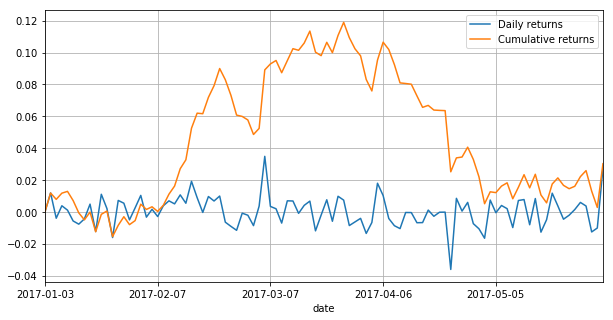

In [20]:
# allocated * 初始投入金额
returns = allocated * 10000
# 计算每天组合投资的价值
Values = returns.sum(axis=1)

# 投资组合的日回报,(今天的收益/昨天的收益)-1
# 买入当天不计,为0
daily_returns = Values.copy()
daily_returns[1:] = (Values[1:] / Values.values[:-1])-1.0
daily_returns.iloc[0] = 0

# 每天的累计回报(每天的组合收益/第一天的组合收益)-1
cum_returns = (Values / Values.iloc[0])-1.0

daily_returns.plot(figsize=(10,5),label='Daily returns')
cum_returns.plot(label='Cumulative returns')
plt.grid()
plt.legend()
plt.show()


In [24]:
# 夏普比率（Sharpe Ratio），又被称为夏普指数 --- 基金绩效评价标准化指标。
# 用净值增长率的平均值 减 无风险利率 再除以净值增长率的标准差就可以得到基金的夏普比率。
# 它反映了单位风险基金净值增长率超过无风险收益率的程度。
# 如果夏普比率为正值，说明在衡量期内基金的平均净值增长率超过了无风险利率，夏普比率越大，说明基金的单位风险所获得的风险回报越高。
# 夏普比率为负时，则相反,按大小排序没有意义。
# 不同的数据采样频率,夏普比率会乘以不同系数k,日采样 k = 根号(252),周采样为 52

# 净值增长率平均值,即 日收益率均值
m_dr = daily_returns.mean()
# 无风险利率,类似银行利息利率或国债利率的日均值,也可以用0代替
risk_free_rate = 0.0
# 净值增长率标准差
std_dr = daily_returns.std()
# 数据为日采样数据,
k = np.sqrt(252)
sharpe_ratio = k * (m_dr - risk_free_rate) / std_dr
print sharpe_ratio

0.572513712026
